In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings

In [3]:
# Create an interpolator function of Z vs (i,j,k)
# This csv

data_Z = pd.read_csv('Well_ijk_xyz.csv')
data_Z.dropna(inplace=True)

# Select input/out, and Split the data into training and testing sets
X_Z = data_Z[['i', 'j', 'k']]
y_Z = data_Z['Z']
X_Z_train, X_Z_test, y_Z_train, y_Z_test = train_test_split(X_Z, y_Z, test_size=0.2, random_state=42)

model_Z = RandomForestRegressor(n_estimators=100, random_state=42)
model_Z.fit(X_Z_train, y_Z_train)

# Make predictions on the test set
y_Z_pred = model_Z.predict(X_Z_test)

# Calculate & Print error metrics
mse_Z = mean_squared_error(y_Z_test, y_Z_pred)
mae_Z = mean_absolute_error(y_Z_test, y_Z_pred)
r2_Z = r2_score(y_Z_test, y_Z_pred)
print(f"Depth Mean Squared Error: {mse_Z}")
print(f"Depth Mean Absolute Error: {mae_Z}")
print(f"Depth R-squared Score: {r2_Z}")

Depth Mean Squared Error: 630.5179982456148
Depth Mean Absolute Error: 18.948947368421056
Depth R-squared Score: 0.9162842318021296


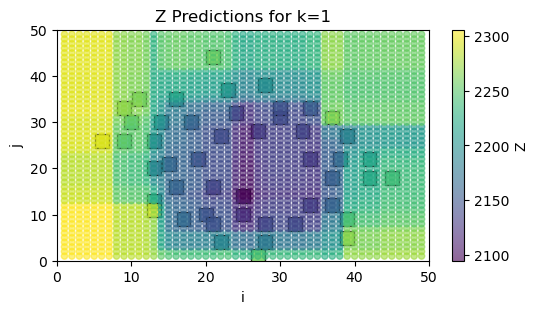

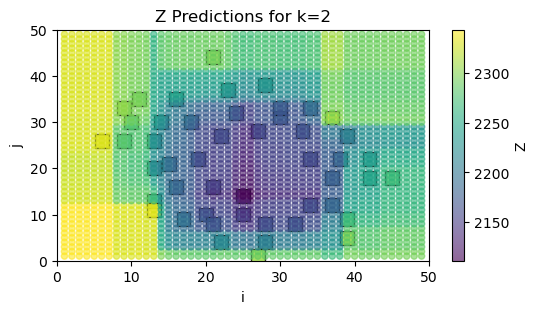

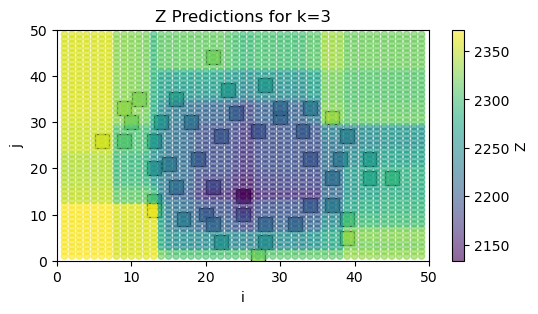

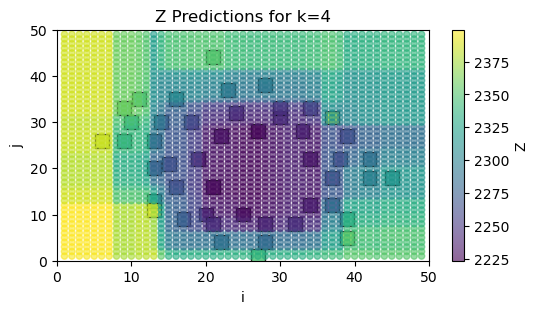

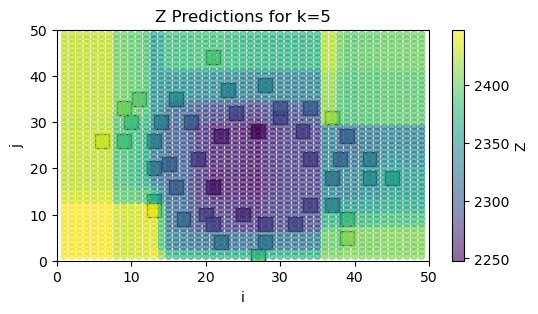

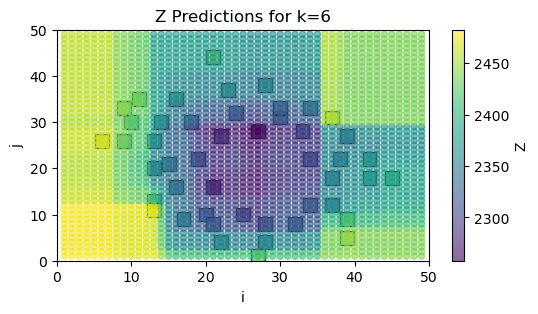

In [6]:
# Plot the function of Z vs (i,j,k)

def predict_Z(i, j, k):
    """
    Predicts the value of Z for given i, j, and k using model_Z.
    Warning messages during prediction are suppressed.
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # Ignore all warnings within this block
        return model_Z.predict([[i, j, k]])[0]

def plot_data_Z(k):
    plt.figure(figsize=(6, 3))
    
    # Define the ranges
    i_range = np.arange(1, 50)
    j_range = np.arange(1, 50)
    
    # Generate predictions
    predictions_Z = []
    for i in i_range:
        for j in j_range:
            Z_pred = predict_Z(i, j, k) # This call will have warnings suppressed
            predictions_Z.append([i, j, Z_pred])

    pred_df_Z = pd.DataFrame(predictions_Z, columns=['i', 'j', 'Z'])

    # Plot the training data
    training_data_Z = data_Z[data_Z['k'] == k]
    if not training_data_Z.empty: # Ensure there is training data to plot
        plt.scatter(training_data_Z['i'], training_data_Z['j'], c=training_data_Z['Z'],
                    marker='s', cmap='viridis', label='Training Data', alpha=0.8, s=100, edgecolors='black') # Added s for size and edgecolors
    else:
        print(f"No training data for k={k} to plot. Only predictions will be shown.")
 
    # Plot the predicted data
    plt.scatter(pred_df_Z['i'], pred_df_Z['j'], c=pred_df_Z['Z'], cmap='viridis', marker='o', label='Predicted Data', alpha=0.6, s=20) # Added s for size

    plt.xlabel('i')
    plt.ylabel('j')
    plt.xlim(0, 50)
    plt.ylim(0, 50)
    plt.colorbar(label='Z')
    #plt.legend()
    plt.title(f'Z Predictions for k={k}')
    plt.show()


# --- Loop to plot for k from 1 to 6 ---
for k_val in range(1, 7): # range(1, 7) includes 1 up to (but not including) 7
    plot_data_Z(k=k_val)


Global Z range: [2094.33, 2482.32]


C:\Users\Luigi Saputelli\AppData\Local\Temp\ipykernel_2240\1473589707.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make space for the colorbar


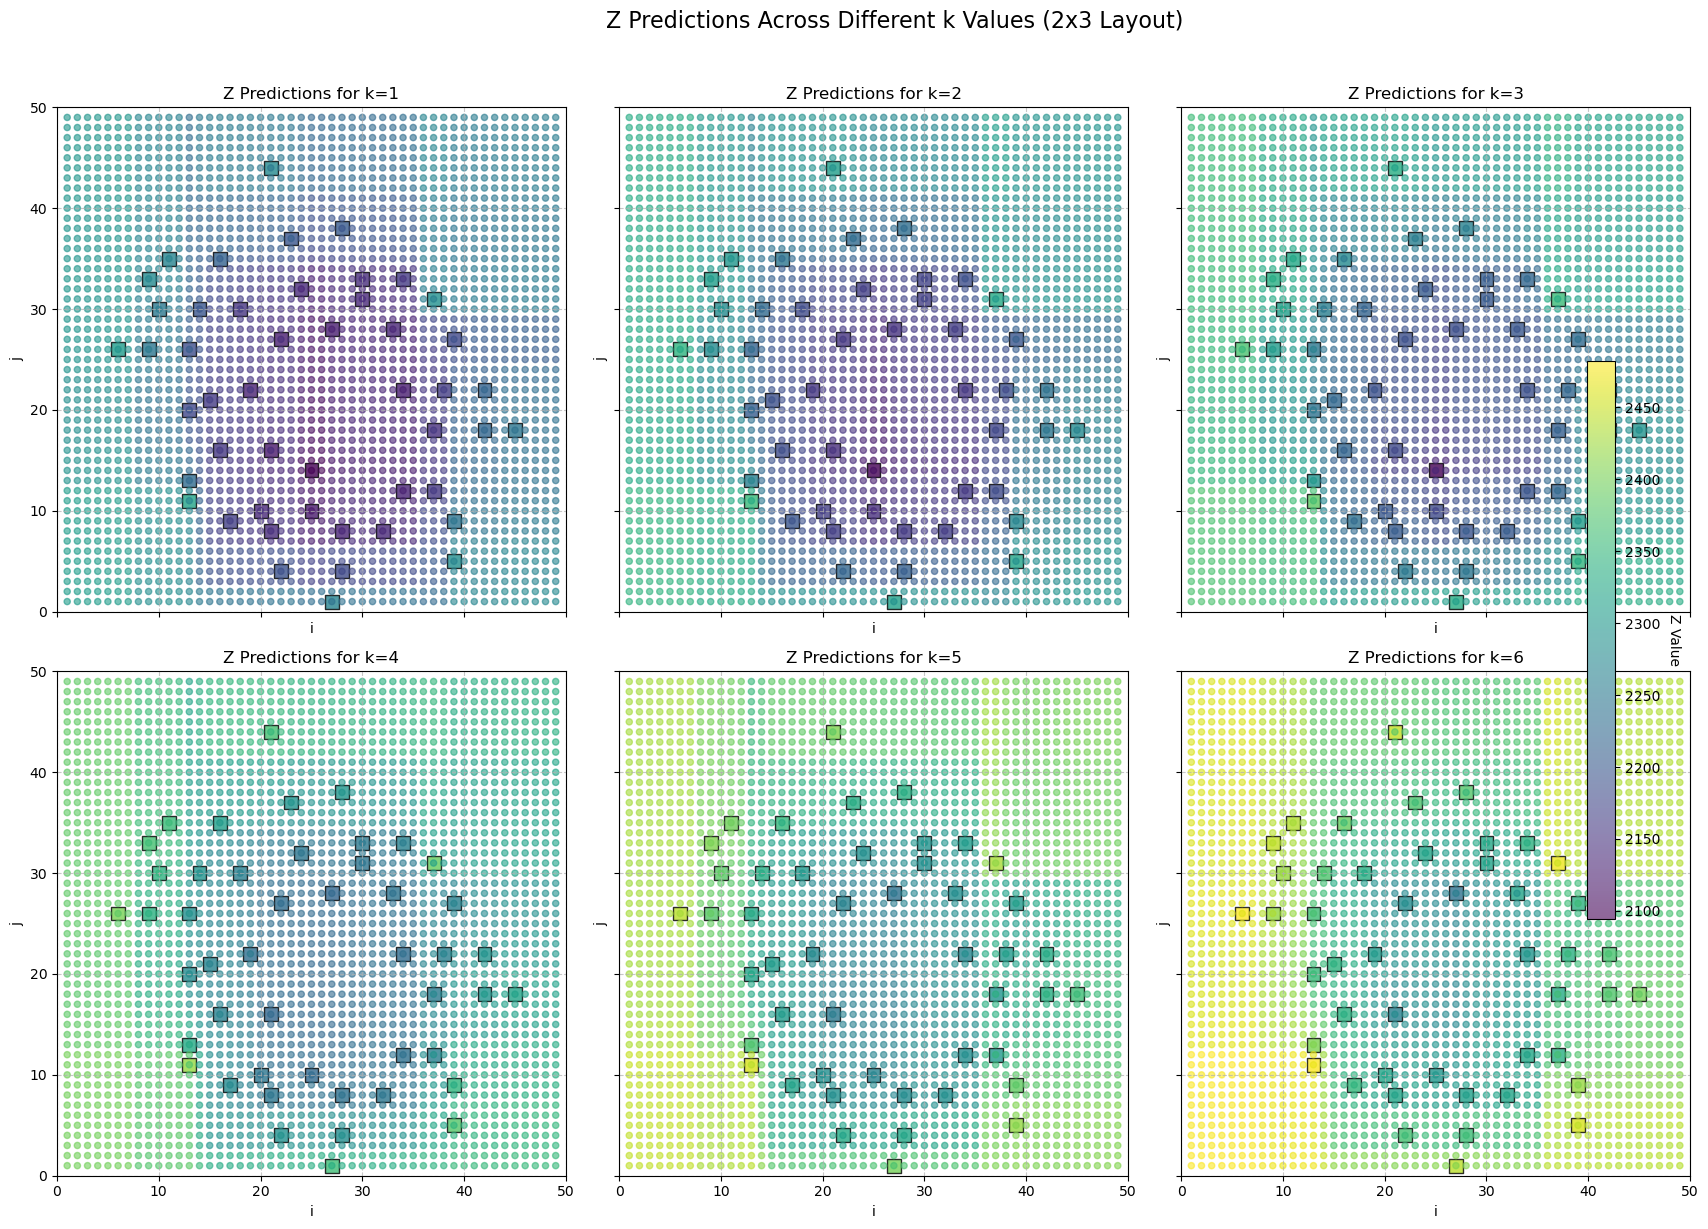

In [8]:
def predict_Z(i, j, k):
    """
    Predicts the value of Z for given i, j, and k using model_Z.
    Warning messages during prediction are suppressed.
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return model_Z.predict([[i, j, k]])[0]

def plot_data_Z(k, ax, global_min_Z, global_max_Z): # Added global_min_Z, global_max_Z
    """
    Plots the predicted Z values along with training data for a specific k on a given axes,
    using a consistent global Z range for the color scale.
    """
    i_range = np.arange(1, 50)
    j_range = np.arange(1, 50)

    predictions_Z = []
    for i in i_range:
        for j in j_range:
            Z_pred = predict_Z(i, j, k)
            predictions_Z.append([i, j, Z_pred])

    pred_df_Z = pd.DataFrame(predictions_Z, columns=['i', 'j', 'Z'])

    # Plot the training data
    training_data_Z = data_Z[data_Z['k'] == k]
    if not training_data_Z.empty:
        # Use global min/max for color scaling here as well
        ax.scatter(training_data_Z['i'], training_data_Z['j'], c=training_data_Z['Z'],
                   marker='s', cmap='viridis', label='Training Data', alpha=0.8, s=100, edgecolors='black',
                   vmin=global_min_Z, vmax=global_max_Z)
    else:
        ax.text(0.5, 0.5, 'No training data', transform=ax.transAxes, ha='center', va='center', color='gray')

    # Plot the predicted data
    # Pass global_min_Z and global_max_Z to vmin/vmax for consistent color scaling
    scatter_plot = ax.scatter(pred_df_Z['i'], pred_df_Z['j'], c=pred_df_Z['Z'], cmap='viridis',
                              marker='o', label='Predicted Data', alpha=0.6, s=20,
                              vmin=global_min_Z, vmax=global_max_Z)

    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    ax.set_title(f'Z Predictions for k={k}')
    ax.grid(True, linestyle='--', alpha=0.7)

    return scatter_plot

## --- Main Plotting Logic ---

# 1. First Pass: Generate ALL predictions to find the global min/max Z
all_predicted_Z_values = []
i_range = np.arange(1, 50)
j_range = np.arange(1, 50)
k_values_to_plot = range(1, 7)

for k_val in k_values_to_plot:
    for i in i_range:
        for j in j_range:
            Z_pred = predict_Z(i, j, k_val)
            all_predicted_Z_values.append(Z_pred)

# Calculate global min/max Z from all generated predictions
global_min_Z = min(all_predicted_Z_values)
global_max_Z = max(all_predicted_Z_values)

# Add a small buffer to min/max for better visualization, if desired
# global_min_Z = global_min_Z - (global_max_Z - global_min_Z) * 0.05
# global_max_Z = global_max_Z + (global_max_Z - global_min_Z) * 0.05

print(f"Global Z range: [{global_min_Z:.2f}, {global_max_Z:.2f}]")


# 2. Second Pass: Create and plot on subplots using the global min/max
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True) # Increased figsize for better detail
axs = axs.flatten()

scatter_handle = None # Will store a scatter plot handle for the common colorbar

for idx, k_val in enumerate(k_values_to_plot):
    current_ax = axs[idx]
    # Pass the global min/max Z values to the plotting function
    current_scatter = plot_data_Z(k=k_val, ax=current_ax, global_min_Z=global_min_Z, global_max_Z=global_max_Z)
    if scatter_handle is None:
        scatter_handle = current_scatter # Store the handle from the first plot for the colorbar

# Add a single colorbar for the entire figure, using the stored scatter handle
cbar = fig.colorbar(scatter_handle, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Z Value', rotation=270, labelpad=15) # Rotate label for better readability

plt.suptitle('Z Predictions Across Different k Values (2x3 Layout)', y=1.02, fontsize=16) # Add a super title
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make space for the colorbar
plt.show()

In [ ]:
def predict_Z(i, j, k):
    """
    Predicts the value of Z for given i, j, and k using model_Z.
    Warning messages during prediction are suppressed.
    """
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return model_Z.predict([[i, j, k]])[0]

# MODIFIED plot_data_Z: now accepts pre-calculated pred_df_Z
def plot_data_Z(k, ax, pred_df_Z, global_min_Z, global_max_Z):
    """
    Plots the predicted Z values (from pre-calculated pred_df_Z) along with training data
    for a specific k on a given axes, using a consistent global Z range for the color scale.
    """
    # Plot the training data
    training_data_Z = data_Z[data_Z['k'] == k]
    if not training_data_Z.empty:
        ax.scatter(training_data_Z['i'], training_data_Z['j'], c=training_data_Z['Z'],
                   marker='s', cmap='viridis', label='Training Data', alpha=0.8, s=100, edgecolors='black',
                   vmin=global_min_Z, vmax=global_max_Z)
    else:
        ax.text(0.5, 0.5, 'No training data', transform=ax.transAxes, ha='center', va='center', color='gray')

    # Plot the predicted data (using the passed pred_df_Z)
    scatter_plot = ax.scatter(pred_df_Z['i'], pred_df_Z['j'], c=pred_df_Z['Z'], cmap='viridis',
                              marker='o', label='Predicted Data', alpha=0.6, s=20,
                              vmin=global_min_Z, vmax=global_max_Z)

    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    ax.set_title(f'Z Predictions for k={k}')
    ax.grid(True, linestyle='--', alpha=0.7)

    return scatter_plot

## --- Optimized Main Plotting Logic ---

i_range = np.arange(1, 50)
j_range = np.arange(1, 50)
k_values_to_plot = range(1, 7)

# Store all generated prediction DataFrames and all Z values in one pass
all_pred_dfs_by_k = {} # Dictionary to store pred_df_Z for each k
all_predicted_Z_values = [] # List to collect all Z values for global min/max

print("Calculating all predictions (once)...")
for k_val in k_values_to_plot:
    predictions_Z_for_k = []
    for i in i_range:
        for j in j_range:
            Z_pred = predict_Z(i, j, k_val)
            predictions_Z_for_k.append([i, j, Z_pred])

    pred_df_Z_current_k = pd.DataFrame(predictions_Z_for_k, columns=['i', 'j', 'Z'])
    all_pred_dfs_by_k[k_val] = pred_df_Z_current_k # Store the DataFrame
    all_predicted_Z_values.extend(pred_df_Z_current_k['Z'].tolist()) # Collect Z values

# Calculate global min/max Z from the collected values
global_min_Z = min(all_predicted_Z_values)
global_max_Z = max(all_predicted_Z_values)

# Optional: Add a small buffer for better visualization if min/max are exactly at edges
global_min_Z = global_min_Z - (global_max_Z - global_min_Z) * 0.01
global_max_Z = global_max_Z + (global_max_Z - global_min_Z) * 0.01

print(f"Global Z range determined: [{global_min_Z:.2f}, {global_max_Z:.2f}]")

# Create the figure and a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True) # Increased figsize for better detail
axs = axs.flatten()

scatter_handle = None # Will store a scatter plot handle for the common colorbar

# Loop through k and plot on each subplot using the pre-calculated data
for idx, k_val in enumerate(k_values_to_plot):
    current_ax = axs[idx]
    current_pred_df_Z = all_pred_dfs_by_k[k_val] # Retrieve the pre-calculated DataFrame

    # Pass the pre-calculated DataFrame and global min/max Z values to the plotting function
    current_scatter = plot_data_Z(k=k_val, ax=current_ax,
                                  pred_df_Z=current_pred_df_Z,
                                  global_min_Z=global_min_Z,
                                  global_max_Z=global_max_Z)
    if scatter_handle is None:
        scatter_handle = current_scatter # Store the handle from the first plot for the colorbar

# Add a single colorbar for the entire figure, using the stored scatter handle
cbar = fig.colorbar(scatter_handle, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Z Value', rotation=270, labelpad=15) # Rotate label for better readability

plt.suptitle('Z Predictions Across Different k Values (2x3 Layout)', y=1.02, fontsize=16) # Add a super title
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make space for the colorbar
plt.show()

In [37]:
# Load the data for Water Saturation
data = pd.read_csv('Sw_So_Pres_XYZt_to_2023_10pct_BWSAT.csv')

# Eliminate rows with missing values
data.dropna(inplace=True)

# Extract features and target variable
X = data[['i', 'j', 'k', 'Z', 't']]
y = data['BWSAT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Initialize and train the model for Water Saturation

model_Sw = RandomForestRegressor(n_estimators=100, random_state=42)
model_Sw.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_Sw.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Sw Mean Squared Error: {mse}")
print(f"Sw Mean Absolute Error: {mae}")
print(f"Sw R-squared Score: {r2}")

def predict_Sw(i, j, k, Z, t):
    return model_Sw.predict([[i, j, k, Z, t]])[0]


Mean Squared Error: 0.0004555020978120983
Mean Absolute Error: 0.004463706563706623
R-squared Score: 0.9953637730137774


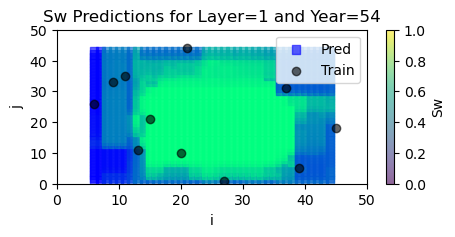

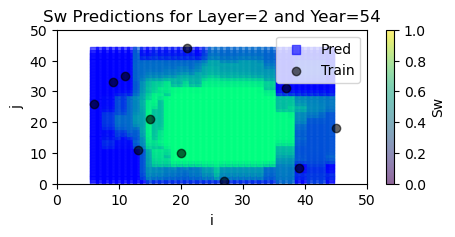

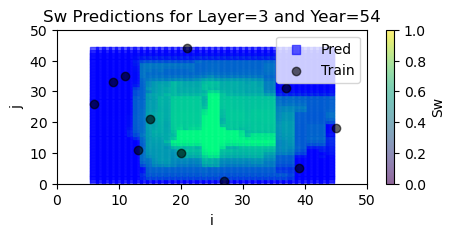

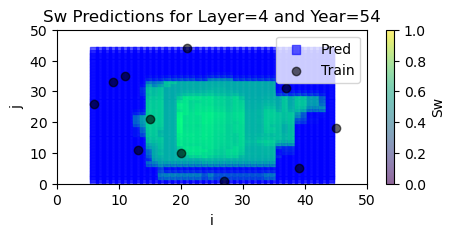

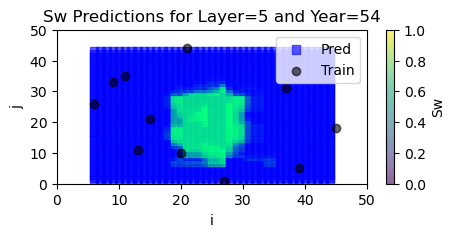

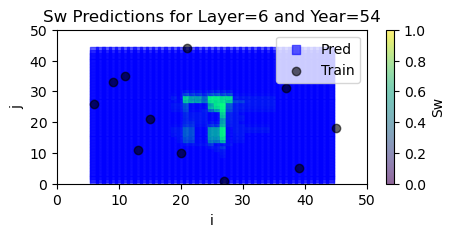

In [75]:
# Plot the function of Sw vs (i,j,k,Z,t)

def plot_data_Sw(k,t):
    
    plt.figure(figsize=(5, 2))
    
    i_range = np.arange(data['i'].min(), data['i'].max())
    j_range = np.arange(data['j'].min(), data['j'].max())
    
    # Generate predictions
    predictions_Sw = []
    for i in i_range:
        for j in j_range:
            Z_pred = predict_Z(i, j, k)
            Sw_pred = predict_Sw(i, j, k, Z_pred, t)
            #print("i=",i," j=",j," k=",k, " t=", t, " Z_pred=", Z_pred, " Sw_pred=", Sw_pred)
            predictions_Sw.append([i, j, k, Z_pred, t, Sw_pred])
    
    pred_df_Sw = pd.DataFrame(predictions_Sw, columns=['i', 'j', 'k', 'Z', 't', 'Sw_pred'])
    
    # Plot the predicted data
    plt.scatter(pred_df_Sw['i'], pred_df_Sw['j'], c=pred_df_Sw['Sw_pred'], cmap='winter_r', marker='s', label='Pred', alpha=0.6)
    
    # Plot the training data
    training_data_Sw = data[ (data['k'] == k) & (data['t'] == t) ]
    plt.scatter(training_data_Sw['i'], training_data_Sw['j'], color="k", marker='o', label='Train', alpha=0.6)
    
    plt.xlabel('i')
    plt.ylabel('j')
    plt.xlim(0, 50)
    plt.ylim(0, 50)
    plt.colorbar(label='Sw', cmap='winter_r')
    plt.legend()
    plt.title(f'Sw Predictions for Layer={k} and Year={t}')
    plt.show()

# Example usage
plot_data_Sw(1,54)
plot_data_Sw(2,54)
plot_data_Sw(3,54)
plot_data_Sw(4,54)
plot_data_Sw(5,54)
plot_data_Sw(6,54)
